<a href="https://colab.research.google.com/github/hankaholla/bp_1.semester/blob/main/bp_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
pip freeze --local > /content/gdrive/My\ Drive/colab_installed.txt

/bin/bash: /content/gdrive/My Drive/colab_installed.txt: No such file or directory


In [5]:
!ls "/content/drive/My Drive"

'5.semester nahravky'
'Anna Hollá, Rachmaninov - Elegie'
 bakalarska_praca
 cvikoUI_zadanie3.zip
 geneticALG.jpg
'IAU Projekt .gdoc'
 PSI_Et3_xwagnerd_xvalkovicovak_xmokos_xholla_zapisky
'Team 2 - personas.pdf'
'Testy a skúšanie.pdf'
 xholla_ProjektProlog.zip
 xholla_xvalkovicova_dump_E3.zip


In [6]:
pip install pydicom

     |████████████████████████████████| 1.9MB 12.6MB/s 


In [19]:
import glob, pylab, pandas as pd
import pydicom, numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pylab as plt
import os
import seaborn as sns
from tqdm import tqdm 

In [10]:
train_images_dir = '/content/drive/My Drive/bakalarska_praca/dataset/myDataset_train/'
train_images = [f for f in listdir(train_images_dir) if isfile(join(train_images_dir, f))]
print('Príklad dcm súboru', train_images[0])
print('Počet dcm súborov:', len(train_images))

Príklad dcm súboru ID_0000ca2f6.dcm
Počet dcm súborov: 1000


In [11]:
df_labels = pd.read_csv('/content/drive/My Drive/bakalarska_praca/dataset/stage_2_train.csv', index_col=0)

In [12]:
df_labels = df_labels.reset_index(drop=False)
df_labels

,ID,Label
0,ID_12cadc6af_epidural,0
1,ID_12cadc6af_intraparenchymal,0
2,ID_12cadc6af_intraventricular,0
3,ID_12cadc6af_subarachnoid,0
4,ID_12cadc6af_subdural,0
...,...,...
4516837,ID_4a85a3a3f_intraparenchymal,0
4516838,ID_4a85a3a3f_intraventricular,0
4516839,ID_4a85a3a3f_subarachnoid,0
4516840,ID_4a85a3a3f_subdural,0


In [ ]:
df = pd.DataFrame() 
for i in tqdm(range (0, len(train_images))):
  imgID = train_images[i].rstrip('.dcm')
  df.append(df_labels[df_labels['ID'].astype('str').str.contains(imgID)])
df

In [22]:
df = pd.read_csv('/content/drive/My Drive/bakalarska_praca/dataset/train_subset.csv', index_col=0)

In [31]:
df.head()

,ID,Label
0,ID_12cadc6af_epidural,0
1,ID_12cadc6af_intraparenchymal,0
2,ID_12cadc6af_intraventricular,0
3,ID_12cadc6af_subarachnoid,0
4,ID_12cadc6af_subdural,0


In [15]:
# df.to_csv('/content/drive/My Drive/bakalarska_praca/dataset/train_subset.csv', index=False)

In [29]:
df = df.reset_index(drop=False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006 entries, 0 to 6005
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      6006 non-null   object
 1   Label   6006 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 94.0+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


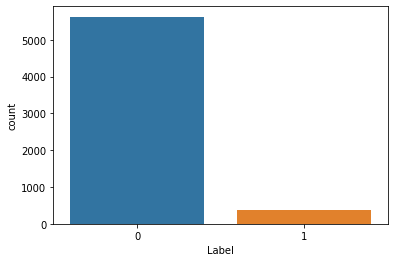

In [26]:
sns.countplot(df.Label)

In [32]:
df.Label.value_counts()

0    5629
1     377
Name: Label, dtype: int64

In [33]:
df['Subtype'] = df['ID'].str.split("_", n = 3, expand = True)[2]
df.groupby('Subtype').sum()

,Label
Subtype,
any,160
epidural,8
intraparenchymal,54
intraventricular,43
subarachnoid,43
subdural,69


In [34]:
df

,ID,Label,Subtype
0,ID_12cadc6af_epidural,0,epidural
1,ID_12cadc6af_intraparenchymal,0,intraparenchymal
2,ID_12cadc6af_intraventricular,0,intraventricular
3,ID_12cadc6af_subarachnoid,0,subarachnoid
4,ID_12cadc6af_subdural,0,subdural
...,...,...,...
6001,ID_00f4e78c2_intraparenchymal,0,intraparenchymal
6002,ID_00f4e78c2_intraventricular,0,intraventricular
6003,ID_00f4e78c2_subarachnoid,0,subarachnoid
6004,ID_00f4e78c2_subdural,0,subdural


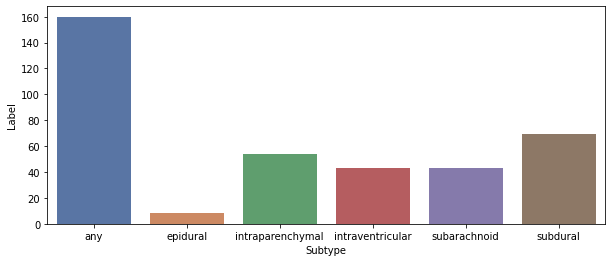

In [111]:
plt.figure(figsize=(10,4)) 
sns.barplot(y=df.groupby('Subtype').sum().Label, x=df.groupby('Subtype').sum().index, palette="deep")

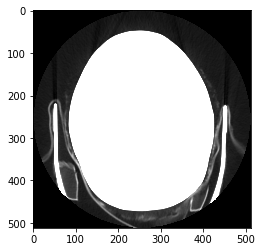

In [36]:
image_path = train_images_dir + train_images[0]
ds = pydicom.dcmread(image_path)
plt.imshow(ds.pixel_array, cmap = pylab.cm.gist_gray, vmin=0, vmax=255)

In [112]:
image = pydicom.read_file(train_images_dir + train_images[1])
image

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 10000000106027
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'RSNA Challenge 2019'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_0000f1657
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_df70c823'
(0020, 000d) Study Instance UID                  UI: ID_04ef429610
(0020, 000e) Series Instance UID                 UI: ID_245e16180c
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: [-115, -11, 367]
(0020, 0037) Image Orientation (Patient)         DS: [1, 0, 0, 0, 1, 0]
(0028, 0002) Samples per

In [125]:
train_images[0]

'ID_0000ca2f6.dcm'

In [36]:
# image[0x10,0x20].value
print(image.SOPInstanceUID)
print(image.pixel_array)
ds.pixel_array.shape
x = 0;

print(x)

ID_0000ca2f6
[[-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 ...
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]]
206372


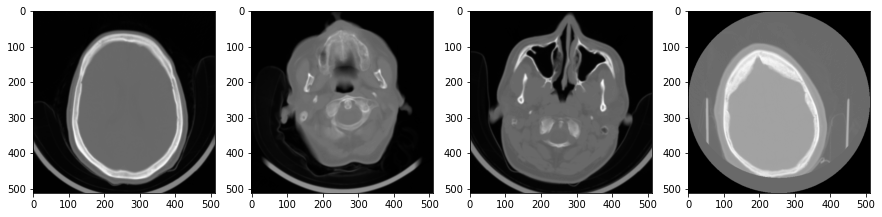

In [89]:
fig=plt.figure(figsize=(15, 10))
for i in range(1, 4*1 +1):
    ds = pydicom.dcmread(train_images_dir + train_images[i])
    fig.add_subplot(1, 4, i)
    plt.imshow(ds.pixel_array, cmap=pylab.cm.gist_gray)
    fig.add_subplot

In [109]:
metadata = ['SOPInstanceUID', 'Modality', 'PatientID', 'StudyInstanceUID', 'SeriesInstanceUID', 
            'StudyID', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 
            'PhotometricInterpretation', 'Rows', 'Columns', 'BitsAllocated','BitsStored',
            'WindowCenter', 'WindowWidth']
dictMetadata = {column: [] for column in metadata}


for img in tqdm(train_images): 
    image_path = train_images_dir + img
    dcmObj = pydicom.dcmread(image_path)
  
    for col in metadata: 
        dictMetadata[col].append(str(getattr(dcmObj, col)))


metadata_df = pd.DataFrame(dictMetadata)
metadata_df


100%|██████████| 1000/1000 [04:51<00:00,  3.43it/s]


,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,BitsAllocated,BitsStored,WindowCenter,WindowWidth
0,ID_0000ca2f6,CT,ID_8c5a14af,ID_a84b7a0dcd,ID_d6ba679446,,"[-125.000, -112.463, 110.602]","[1.000000, 0.000000, 0.000000, 0.000000, 0.920...",1,MONOCHROME2,512,512,16,16,30,80
1,ID_0000f1657,CT,ID_df70c823,ID_04ef429610,ID_245e16180c,,"[-115, -11, 367]","[1, 0, 0, 0, 1, 0]",1,MONOCHROME2,512,512,16,12,"[00036, 00036]","[00080, 00080]"
2,ID_0000aee4b,CT,ID_ce5f0b6c,ID_9aad90e421,ID_1e59488a44,,"[-108.5, 14.5, 94]","[1, 0, 0, 0, 1, 0]",1,MONOCHROME2,512,512,16,12,"[00036, 00036]","[00080, 00080]"
3,ID_000b53a57,CT,ID_e05ab819,ID_acde2ddc8b,ID_3abce50496,,"[-118.5, 4.5, 213.699951]","[1, 0, 0, 0, 1, 0]",1,MONOCHROME2,512,512,16,12,"[00036, 00036]","[00080, 00080]"
4,ID_000a33979,CT,ID_a19b4867,ID_acdc6ca429,ID_49da787d8b,,"[-125.000000, -95.697983, 145.482162]","[1.000000, 0.000000, 0.000000, 0.000000, 0.927...",1,MONOCHROME2,512,512,16,16,30,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ID_00f4a6124,CT,ID_2c70e395,ID_c9835bc6be,ID_a5c5fa1e82,,"[-125, -7, 223.699951]","[1, 0, 0, 0, 1, 0]",1,MONOCHROME2,512,512,16,12,"[00036, 00036]","[00080, 00080]"
996,ID_00f5a962f,CT,ID_a0b76f75,ID_1d5c3c2e5b,ID_efde187adf,,"[-119, 41.8301796, 203.863467]","[1, 0, 0, 0, 0.927183855, -0.374606593]",1,MONOCHROME2,512,512,16,12,"[00040, 00040]","[00080, 00080]"
997,ID_00f4b5081,CT,ID_e0c760b0,ID_d2f8df6234,ID_d0c1774458,,"[-125.000000, -130.397980, 168.709549]","[1.000000, 0.000000, 0.000000, 0.000000, 0.927...",1,MONOCHROME2,512,512,16,16,30,80
998,ID_00f4db9c4,CT,ID_033c2d91,ID_f127591756,ID_e0a5035599,,"[-112, -1, 738.699951]","[1, 0, 0, 0, 1, 0]",1,MONOCHROME2,512,512,16,12,"[00036, 00036]","[00080, 00080]"


In [110]:
# metadata_df.to_csv('/content/drive/My Drive/bakalarska_praca/dataset/dcm_metadata.csv', index=False)

In [39]:
metadata_df = pd.read_csv('/content/drive/My Drive/bakalarska_praca/dataset/dcm_metadata.csv', index_col=0)
metadata_df

,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,BitsAllocated,BitsStored,WindowCenter,WindowWidth
SOPInstanceUID,,,,,,,,,,,,,,,
ID_0000ca2f6,CT,ID_8c5a14af,ID_a84b7a0dcd,ID_d6ba679446,NaN,"[-125.000, -112.463, 110.602]","[1.000000, 0.000000, 0.000000, 0.000000, 0.920...",1,MONOCHROME2,512,512,16,16,30,80
ID_0000f1657,CT,ID_df70c823,ID_04ef429610,ID_245e16180c,NaN,"[-115, -11, 367]","[1, 0, 0, 0, 1, 0]",1,MONOCHROME2,512,512,16,12,"[00036, 00036]","[00080, 00080]"
ID_0000aee4b,CT,ID_ce5f0b6c,ID_9aad90e421,ID_1e59488a44,NaN,"[-108.5, 14.5, 94]","[1, 0, 0, 0, 1, 0]",1,MONOCHROME2,512,512,16,12,"[00036, 00036]","[00080, 00080]"
ID_000b53a57,CT,ID_e05ab819,ID_acde2ddc8b,ID_3abce50496,NaN,"[-118.5, 4.5, 213.699951]","[1, 0, 0, 0, 1, 0]",1,MONOCHROME2,512,512,16,12,"[00036, 00036]","[00080, 00080]"
ID_000a33979,CT,ID_a19b4867,ID_acdc6ca429,ID_49da787d8b,NaN,"[-125.000000, -95.697983, 145.482162]","[1.000000, 0.000000, 0.000000, 0.000000, 0.927...",1,MONOCHROME2,512,512,16,16,30,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_00f4a6124,CT,ID_2c70e395,ID_c9835bc6be,ID_a5c5fa1e82,NaN,"[-125, -7, 223.699951]","[1, 0, 0, 0, 1, 0]",1,MONOCHROME2,512,512,16,12,"[00036, 00036]","[00080, 00080]"
ID_00f5a962f,CT,ID_a0b76f75,ID_1d5c3c2e5b,ID_efde187adf,NaN,"[-119, 41.8301796, 203.863467]","[1, 0, 0, 0, 0.927183855, -0.374606593]",1,MONOCHROME2,512,512,16,12,"[00040, 00040]","[00080, 00080]"
ID_00f4b5081,CT,ID_e0c760b0,ID_d2f8df6234,ID_d0c1774458,NaN,"[-125.000000, -130.397980, 168.709549]","[1.000000, 0.000000, 0.000000, 0.000000, 0.927...",1,MONOCHROME2,512,512,16,16,30,80
